<a href="https://colab.research.google.com/github/MochAgungPrawiro/MochAgungPrawiro/blob/main/Copy_of_RB_%26_KM_3_2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RB & KM 3-2

## A. Membangun Model dengan Sequential API

In [ ]:
# Import Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Contoh 1:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 1 hidden layer dengan 10 neuron
# Memiliki 1 output layer dengan 1 neuron

model11 = Sequential()
model11.add(Dense(10, input_shape=(8,)))
model11.add(Dense(1))

# model11.summary()

In [ ]:
# Contoh 1 (2):

model12 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(8,)),
    tf.keras.layers.Dense(1)
])

# model12.summary()

# model122 = Sequential([
#    Dense(10, input_shape=(8,)),
#    Dense(1)
# ])

# model122.summary()

In [ ]:
# Contoh 2:
# Memiliki 1 input layer dengan 10 neuron (menerima 10 input)
# Memiliki 5 hidden layer
# Memiliki 1 output layer dengan 1 neuron

model2 = Sequential()
model2.add(Dense(100, input_shape=(10,))) # h1
model2.add(Dense(80)) # h2
model2.add(Dense(30)) # h3
model2.add(Dense(10)) # h4
model2.add(Dense(5)) # h5
model2.add(Dense(1))

# model2.summary()

## B. Membangun Model dengan Functional API

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras import Model

In [ ]:
# Contoh 3:
# Memiliki 1 input layer dengan 8 neuron (menerima 8 input)
# Memiliki 2 hidden layer
# Memiliki 1 output layer dengan 1 neuron

in_layer = Input(shape=(8,))
hid_layer1 = Dense(10)(in_layer)
hid_layer2 = Dense(5)(hid_layer1)
out_layer = Dense(1)(hid_layer2)

# Define Model
model3 = Model(inputs=in_layer, outputs=out_layer)
# model3.summary()

# Build Deep Learning Model

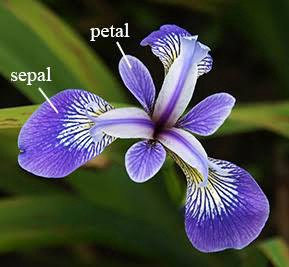

In [ ]:
from pandas import read_csv
from numpy import argmax # array get max (get posisi nilai terbesar dalam array)
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense

## 1. Gathering Data

In [ ]:
url = 'https://raw.githubusercontent.com/achmatim/data-mining/main/Dataset/iris.csv'
df = read_csv(url)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Preparing Data

### A. Pisahkan dataset menjadi feature (X) dan label (y)

In [ ]:
X = df.values[:, :-1]
y = df.values[:, -1]

# X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=object)

In [ ]:
X = X.astype('float32') # ubah tipe data dalam X menjadi float
X[0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]], dtype=float32)

In [ ]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
from sklearn.preprocessing import LabelBinarizer # encode label nilai kategorik menjadi nilai numerik

y = LabelBinarizer().fit_transform(y) # encode label menjadi nilai numerik
y

### B. Split Data menjadi training dan testing dataset



In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
# n_features = X_train.shape[1]
# print(n_features)

(120, 4) (30, 4) (120, 3) (30, 3)


## 3. Deep Learning Model Life-Cycle (DLMLC)

### A. Define the Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
n_features = X_train.shape[1]

model = Sequential()
model.add(Dense(14, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# model.summary()

### B. Compile the Model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss = 'binary_crossentropy',
    metrics = ['Recall']
)

### C. Fit the Model

In [ ]:
model.fit(X_train, y_train, batch_size=32,epochs=150,verbose=2)

Epoch 1/150
4/4 - 2s - loss: 1.5830 - recall: 0.3333 - 2s/epoch - 427ms/step
Epoch 2/150
4/4 - 0s - loss: 1.5810 - recall: 0.3333 - 23ms/epoch - 6ms/step
Epoch 3/150
4/4 - 0s - loss: 1.5792 - recall: 0.3333 - 16ms/epoch - 4ms/step
Epoch 4/150
4/4 - 0s - loss: 1.5772 - recall: 0.3333 - 15ms/epoch - 4ms/step
Epoch 5/150
4/4 - 0s - loss: 1.5754 - recall: 0.3333 - 15ms/epoch - 4ms/step
Epoch 6/150
4/4 - 0s - loss: 1.5733 - recall: 0.3333 - 18ms/epoch - 5ms/step
Epoch 7/150
4/4 - 0s - loss: 1.5715 - recall: 0.3333 - 44ms/epoch - 11ms/step
Epoch 8/150
4/4 - 0s - loss: 1.5696 - recall: 0.3333 - 24ms/epoch - 6ms/step
Epoch 9/150
4/4 - 0s - loss: 1.5676 - recall: 0.3333 - 25ms/epoch - 6ms/step
Epoch 10/150
4/4 - 0s - loss: 1.5658 - recall: 0.3333 - 16ms/epoch - 4ms/step
Epoch 11/150
4/4 - 0s - loss: 1.5639 - recall: 0.3333 - 21ms/epoch - 5ms/step
Epoch 12/150
4/4 - 0s - loss: 1.5619 - recall: 0.3333 - 18ms/epoch - 5ms/step
Epoch 13/150
4/4 - 0s - loss: 1.5602 - recall: 0.3333 - 31ms/epoch - 8ms

### D. Evaluate the Model

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {acc}')

1/1 - 1s - loss: 1.3910 - recall: 0.0000e+00 - 590ms/epoch - 590ms/step
Test Accuracy: 0.0


### E. Make Prediction

In [ ]:
new_data = [5.1, 3.5, 1.4, 0.2]

y_pred = model.predict([new_data])

print(f'Predicted: {y_pred} (class = {argmax(y_pred)})')

Predicted: [[0.45906717 0.07760363 0.4633293 ]] (class = 2)


# Visualize Deep Learning Model

## A. Model Text Description

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

# summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1100      
                                                                 
 dense_17 (Dense)            (None, 80)                8080      
                                                                 
 dense_18 (Dense)            (None, 30)                2430      
                                                                 
 dense_19 (Dense)            (None, 10)                310       
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 11,981
Trainable params: 11,981
Non-trai

## B. Model Architecture Plot

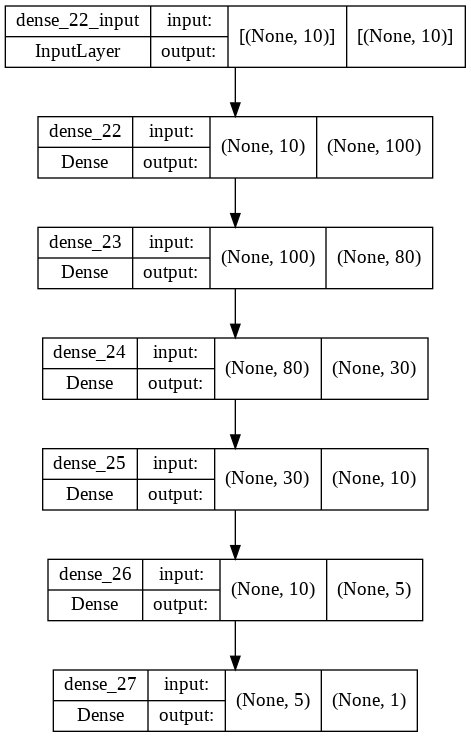

In [ ]:
from tensorflow.keras.utils import plot_model

# define model
model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

# summarize the model
plot_model(model, 'model.png', show_shapes=True)

# Plotting Learning Curve

In [ ]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', ))
# model.add(Dense(5, activation='relu', ))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model (simpan di hist)
history = model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=0,validation_split=0.3)

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Test Accuracy: 0.367
Predicted: [[0.34411076 0.00143959 0.65444964]] (class=2)


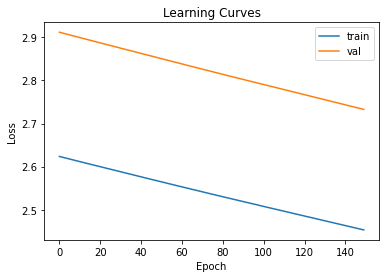

In [ ]:
from matplotlib import pyplot

# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

# Save and Load Model

In [ ]:
# save model to file
model.save('model.h5') # Hierarchical Data Format 5

In [ ]:
from tensorflow.keras.models import load_model

# load the model from file
model = load_model('model.h5')

# make a prediction
row = [5.1,3.5,1.4,0.2]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Predicted: [[0.34411076 0.00143959 0.65444964]] (class=2)


# Deep Learning Techniques

## Dropout

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(Dense(30))
model.add(Dense(10))
model.add(Dense(5))
model.add(Dense(1))

model.add(Dropout(0.5))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 100)               1100      
                                                                 
 dense_32 (Dense)            (None, 80)                8080      
                                                                 
 dense_33 (Dense)            (None, 30)                2430      
                                                                 
 dense_34 (Dense)            (None, 10)                310       
                                                                 
 dense_35 (Dense)            (None, 5)                 55        
                                                                 
 dense_36 (Dense)            (None, 1)                 6         
                                                                 
 dropout (Dropout)           (None, 1)                

## Batch Normalization

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(100, input_shape=(10,)))
model.add(Dense(80))
model.add(BatchNormalization())
model.add(Dense(30))
model.add(BatchNormalization())
model.add(Dense(10))
model.add(BatchNormalization())
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               1100      
                                                                 
 dense_38 (Dense)            (None, 80)                8080      
                                                                 
 batch_normalization (BatchN  (None, 80)               320       
 ormalization)                                                   
                                                                 
 dense_39 (Dense)            (None, 30)                2430      
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_40 (Dense)            (None, 10)               

# Latihan

Bangun sebuah model DL untuk dataset berikut [ini](https://drive.google.com/file/d/1gnWGSTlr0QgJAyxUszEKvtRtCVR0qS6Y/view?usp=sharing).

Nilai latihan akan diambil dari accuracy model yang kamu bangun.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
import pandas as pd
df = pd.read_csv('diabetes_dataset.csv')
df



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X = df.values[:, :-1]
y = df.values[:, -1]

# X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik

y = LabelEncoder().fit_transform(y) # encode label menjadi nilai numerik
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# memperoleh banyaknya jumlah fitur pada input
# n_features = X_train.shape[1]
# print(n_features)

(614, 8) (154, 8) (614,) (154,)
